In [ ]:
#| hide
from nbdev.showdoc import *
from diffusion_curvature.core import *
from diffusion_curvature.datasets import *


# diffusion_curvature

> Fast graph curvature

[![Docs](https://github.com/professorwug/diffusion_curvature/actions/workflows/deploy.yaml/badge.svg)](https://github.com/professorwug/diffusion_curvature/actions/workflows/deploy.yaml) [![CI](https://github.com/professorwug/diffusion_curvature/actions/workflows/test.yaml/badge.svg)](https://github.com/professorwug/diffusion_curvature/actions/workflows/test.yaml)

Diffusion Curvature is a hyper-fast algorithm for the computation of pointwise graph curvature. It computes curvature as the *laziness* of diffusions emanating from each point. 

Our method was published in NeurIPS 2022. Here's [the paper](https://arxiv.org/pdf/2206.03977v1.pdf).

For an intuitive walkthrough of the algorithm, see [Diffusion Curvature, Explained](https://x.riddle.press/diffusion_curvature/diffusion_curvature_explained.html).

## Install

Diffusion curvature is not (yet) available on PyPI or conda. 
To install and use it, clone this repo, and run `pip install .` from within.
Alternatively, you can use the self-contained `get_diffusion_curvature.py` function.

## How to use

Given a dataset, like this torus, you can compute the diffusion curvature of each node in two simple steps.
Diffusion curvature works both on point-cloud datasets like this, and on abstract graphs (like social networks).

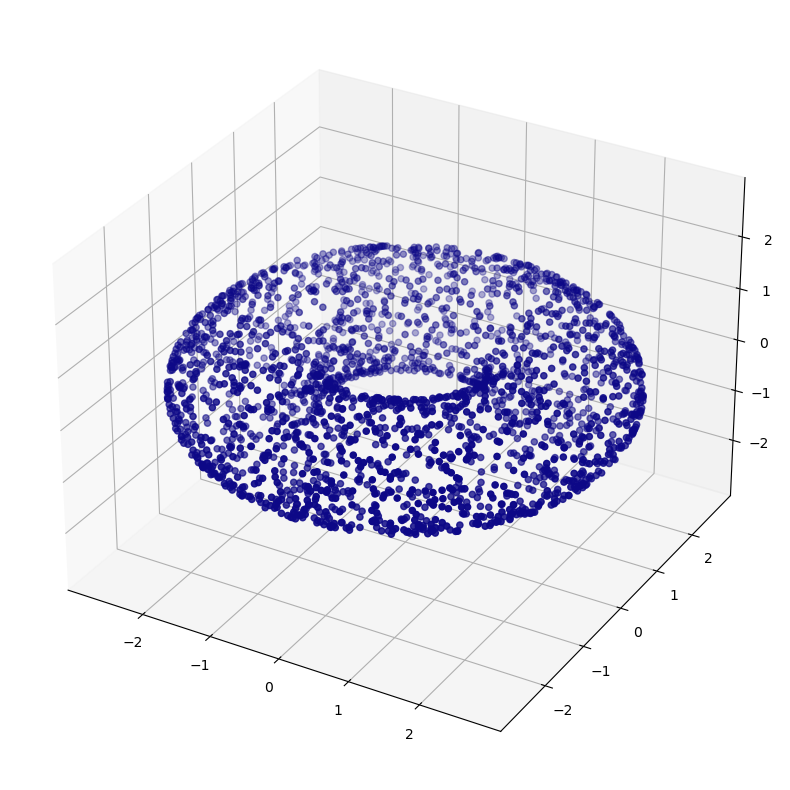

In [ ]:
X, ks = torus(5000)
plot_3d(X)

First, compute the diffusion matrix of the torus. You can do this via our convenient helper function, which combines the computation of a kernel and row-normalization to make the matrix `P` of random walks. If using a premade graph, you can, of course, just row-normalize your existing adjacency matrix.

In [ ]:
from diffusion_curvature.core import DiffusionMatrix

In [ ]:
show_doc(DiffusionMatrix)

---

[source](https://github.com/professorwug/diffusion_curvature/blob/master/diffusion_curvature/core.py#LNone){target="_blank" style="float:right; font-size:smaller"}

### DiffusionMatrix

>      DiffusionMatrix (X, kernel_type='fixed', sigma=0.7, k=20, alpha=0.5,
>                       affinity_matrix_only=False)

Given input12 X returns a diffusion matrix P, as an numpy ndarray.
X is a numpy array of size n x d
kernel_type is a string, either "fixed" or "adaptive" or "anisotropic" or "adaptive anisotropic"
sigma is the non-adaptive gaussian kernel parameter
k is the adaptive kernel parameter
Returns:
P is a numpy array of size n x n that is the diffusion matrix

In [ ]:
P = DiffusionMatrix(X, kernel_type="adaptive anisotropic", k=20)

Next, give this matrix to the diffusion curvature function. Specify the number of powers you want to raise the diffusion matrix to (akin to the number of steps to take in the random walk). More steps better differentiates the curvature, but too many washes everything out, as the powered diffusion matrix converges to a steady-state diffusion. The optimal step number varies by dataset, depending on the number of points and dimension.

This is fastest if you make the number of steps a power of two. 8 works well for this type of dataset.

In [ ]:
from diffusion_curvature.laziness import curvature

In [ ]:
show_doc(curvature)

---

[source](https://github.com/professorwug/diffusion_curvature/blob/master/diffusion_curvature/laziness.py#LNone){target="_blank" style="float:right; font-size:smaller"}

### curvature

>      curvature (P, diffusion_powers=8, aperture=20, smoothing=1,
>                 verbose=False, return_density=False,
>                 dynamically_adjusting_neighborhood=False,
>                 precomputed_powered_P=None, non_lazy_diffusion=False,
>                 avg_transition_probability=True, use_min_threshold=False)

Diffusion Laziness Curvature
Estimates curvature by measuring the amount of mass remaining within an initial neighborhood after t steps of diffusion. Akin to measuring the laziness of a random walk after t steps.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| P | n x n ndarray |  | The diffusion matrix of the graph |
| diffusion_powers | int | 8 | Number of steps of diffusion to take before measuring the laziness, by default 8 |
| aperture | int | 20 | The size of the initial neighborhood, from which the percentage of mass remaining in this neighborhood is calculated, by default 20 |
| smoothing | int | 1 | Amount of smoothing to apply. Currently works by multiplying the raw laziness values with the diffusion operator, as a kind of iterated weighted averaging; by default 1 |
| verbose | bool | False | Print diagnostics, by default False |
| return_density | bool | False | Return the number of neighbors each point shares, by default False |
| dynamically_adjusting_neighborhood | bool | False | Whether to give each point the same initial neighborhood size, by default False |
| precomputed_powered_P | NoneType | None | Optionally pass a precomputed powered diffusion operator, to speed up computation, by default None |
| non_lazy_diffusion | bool | False |  |
| avg_transition_probability | bool | True |  |
| use_min_threshold | bool | False |  |
| **Returns** | **length n array** |  | **The laziness curvature values for each point** |

In [ ]:
diffusion_curvatures = curvature(P, diffusion_powers = 8)

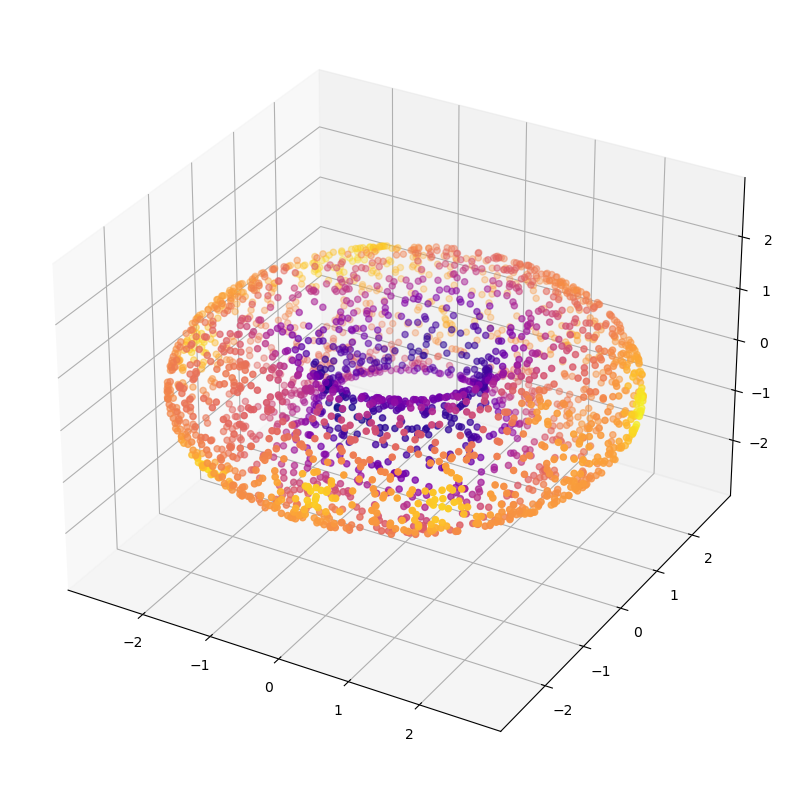

In [ ]:
plot_3d(X,diffusion_curvatures)